# Work With Time Series File For ESSP4
There is one time series file for each data set of the form: `DS#_timeSeries.csv`

For example, the relevant file for data set three (3) would be: `DS3_timeSeries.csv`

In [1]:
import os
from glob import glob
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Specify file name

# Specify data set number
dset_num = 0

# Specify where all the data set folders are, here saved into "essp_dir" variable
essp_dir = '/mnt/home/lzhao/ceph/SolarData/DataSets/Training/'
dset_dir = os.path.join(essp_dir,f'DS{dset_num}')

example_file = os.path.join(dset_dir,f'DS{dset_num}_timeSeries.csv')

## Read in with `pandas`

In [3]:
df = pd.read_csv(example_file)
# Show a snippet of the beginning of the table
df.head()

,Standard File Name,Time [eMJD],RV [m/s],RV Err. [m/s],Exp. Time [s],Airmass,BERV [km/s],Instrument,CCF FWHM [km/s],CCF FWHM Err. [km/s],CCF Contrast,CCF Contrast Err.,BIS [m/s],H-alpha Emission,CaII Emission
0,DS0.001_spec_expres.fits,59332.386292,-23.477,0.176,173.052002,1.049096,-1.016972e+06,expres,6.574721,0.017000,-331676.871338,585.176421,-65.233333,0.171998,0.103016
1,DS0.002_spec_expres.fits,59332.388729,-24.710,0.176,172.856003,1.052028,-1.022273e+06,expres,6.575256,0.017106,-331709.361528,588.816359,-66.016667,0.172291,0.101580
2,DS0.003_spec_expres.fits,59332.396076,-23.658,0.175,172.110001,1.062146,-1.038130e+06,expres,6.574531,0.016911,-331654.573291,582.083520,-62.766667,0.172299,0.100128
3,DS0.004_spec_harpsn.fits,59332.974814,586.691,0.161,300.000000,1.276463,-6.415974e-02,harpsn,6.670495,0.013580,-415890.841740,574.935756,-42.300000,0.173825,0.101191
4,DS0.005_spec_harpsn.fits,59332.978814,588.312,0.162,300.000000,1.256190,-7.089454e-02,harpsn,6.668402,0.014234,-415642.994381,602.360522,-42.716667,0.174372,0.107102


In [4]:
# Here are all the column names
df.columns

Index(['Standard File Name', 'Time [eMJD]', 'RV [m/s]', 'RV Err. [m/s]',
       'Exp. Time [s]', 'Airmass', 'BERV [km/s]', 'Instrument',
       'CCF FWHM [km/s]', 'CCF FWHM Err. [km/s]', 'CCF Contrast',
       'CCF Contrast Err.', 'BIS [m/s]', 'H-alpha Emission', 'CaII Emission'],
      dtype='object')

#### Plot RVs and Errors

/mnt/sw/nix/store/71ksmx7k6xy3v9ksfkv5mp5kxxp64pd6-python-3.10.13-view/lib/python3.10/site-packages/numpy/core/getlimits.py:549: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])
/mnt/sw/nix/store/71ksmx7k6xy3v9ksfkv5mp5kxxp64pd6-python-3.10.13-view/lib/python3.10/site-packages/numpy/core/getlimits.py:89: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  return self._float_to_str(self.smallest_subnormal)


<ErrorbarContainer object of 3 artists>

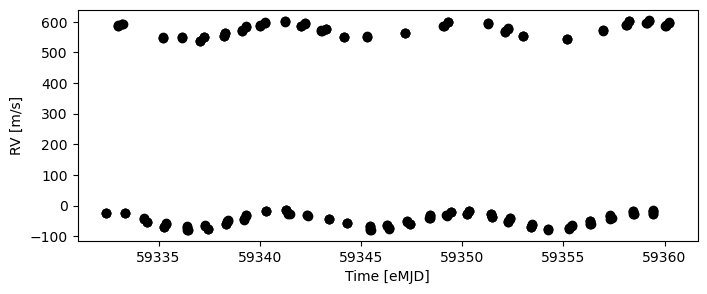

In [5]:
plt.figure(figsize=(8,3))
plt.xlabel('Time [eMJD]')
plt.ylabel('RV [m/s]')
plt.errorbar(df['Time [eMJD]'],df['RV [m/s]'],#yerr=df['RV Err. [m/s]'],
             linestyle='None',marker='o',color='k')

In [6]:
def getInstrumentMask(df):
    inst_col = df['Instrument'].to_numpy()
    inst_list = np.unique(inst_col)
    inst_masks = {}
    for inst in inst_list:
        inst_masks[inst] = inst_col==inst
    return inst_masks

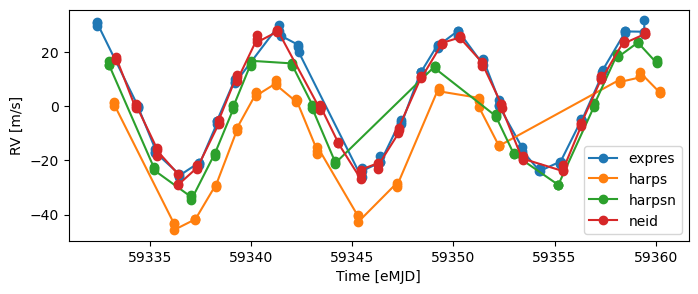

In [7]:
plt.figure(figsize=(8,3))
plt.xlabel('Time [eMJD]')
plt.ylabel('RV [m/s]')
ind = 'RV [m/s]'
inst_masks = getInstrumentMask(df)
for inst in inst_masks.keys():
    imask = inst_masks[inst]
    ind_offset = np.nanmedian(df[ind][imask])
    plt.plot(df['Time [eMJD]'][imask],df[ind][imask]-ind_offset,'o-',label=inst)
plt.legend()

#### Plot Indicators

In [8]:
def getInstrumentMask(df):
    inst_col = df['Instrument'].to_numpy()
    inst_list = np.unique(inst_col)
    inst_masks = {}
    for inst in inst_list:
        inst_masks[inst] = inst_col==inst
    return inst_masks

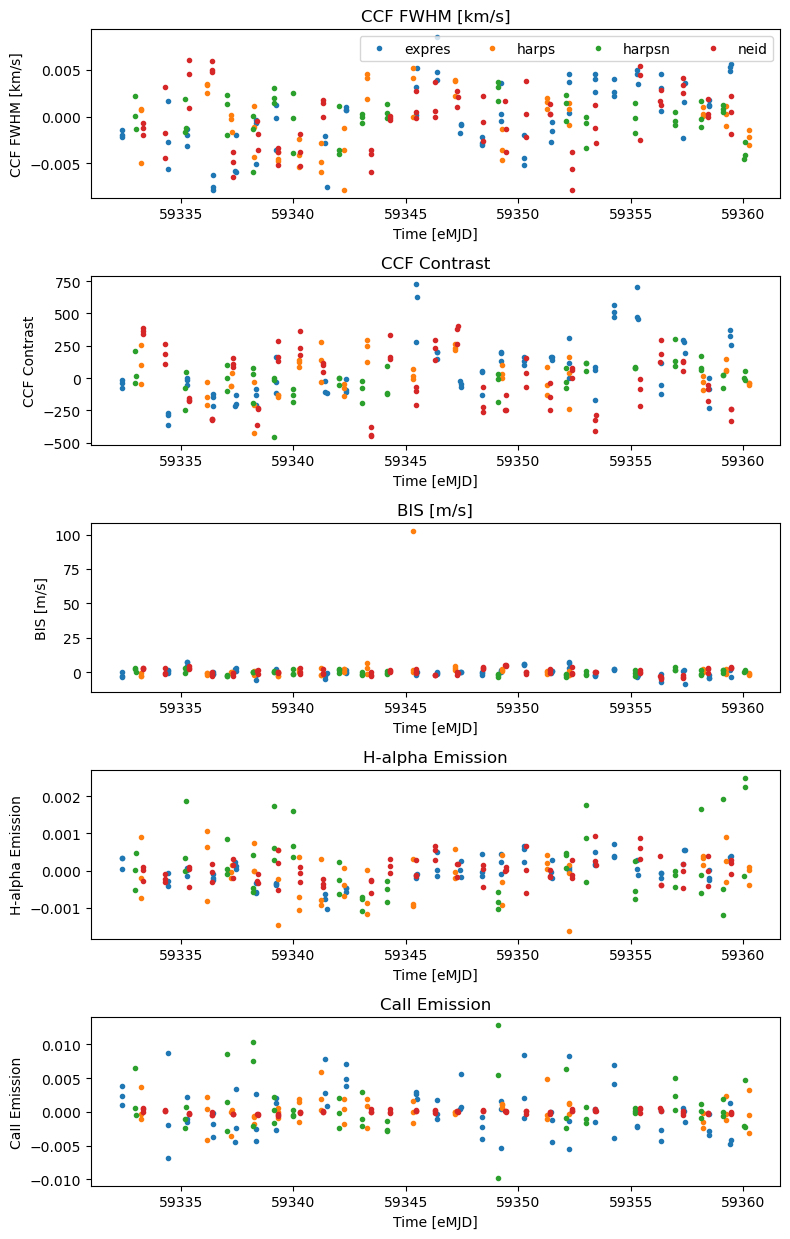

In [9]:
ind_names = ['CCF FWHM [km/s]', 'CCF Contrast', 'BIS [m/s]',
             'H-alpha Emission', 'CaII Emission']

inst_masks = getInstrumentMask(df)

fig, axes = plt.subplots(len(ind_names),1,figsize=(8,len(ind_names)*2.5))
for iind, ind in enumerate(ind_names):
    ax = axes[iind]
    ax.set_title(ind)
    ax.set_xlabel('Time [eMJD]')
    ax.set_ylabel(ind)
    for inst in inst_masks.keys():
        imask = inst_masks[inst]
        ind_offset = np.nanmedian(df[ind][imask])
        ax.plot(df['Time [eMJD]'][imask],df[ind][imask]-ind_offset,'.',label=inst)
axes[0].legend(ncol=4)
fig.tight_layout()

## Rename Columns
I'm not crazy; I know the column names are unwieldy.  Here is code to re-name columns to those of your choosing using `pandas`.  New column names are defined using a dictionary that maps old names to new.  The dictionary does not need to include all column names.

In [10]:
# Here are just some example new column names
# The key should be the original column name; the value should be the new name
col_dict = {
    'Standard File Name' : 'file',
    'Time [eMJD]' : 'time',
    'RV [m/s]' : 'rv',
    'RV Err. [m/s]' : 'e_rv',
    'Exp. Time [s]' : 'exptime',
    'Airmass' : 'airmass',
    'BERV [km/s]' : 'berv',
    'Instrument' : 'inst',
    'CCF FWHM [km/s]' : 'fwhm',
    'CCF FWHM Err. [km/s]' : 'e_fwhm',
    'CCF Contrast' : 'contrast',
    'CCF Contrast Err.' : 'e_contrast',
    'BIS [m/s]' : 'bis',
    'H-alpha Emission' : 'ha',
    'CaII Emission' : 'caii'
}

In [11]:
df = pd.read_csv(example_file)
renamed_df = df.rename(columns=col_dict)
renamed_df.head()

,file,time,rv,e_rv,exptime,airmass,berv,inst,fwhm,e_fwhm,contrast,e_contrast,bis,ha,caii
0,DS0.001_spec_expres.fits,59332.386292,-23.477,0.176,173.052002,1.049096,-1.016972e+06,expres,6.574721,0.017000,-331676.871338,585.176421,-65.233333,0.171998,0.103016
1,DS0.002_spec_expres.fits,59332.388729,-24.710,0.176,172.856003,1.052028,-1.022273e+06,expres,6.575256,0.017106,-331709.361528,588.816359,-66.016667,0.172291,0.101580
2,DS0.003_spec_expres.fits,59332.396076,-23.658,0.175,172.110001,1.062146,-1.038130e+06,expres,6.574531,0.016911,-331654.573291,582.083520,-62.766667,0.172299,0.100128
3,DS0.004_spec_harpsn.fits,59332.974814,586.691,0.161,300.000000,1.276463,-6.415974e-02,harpsn,6.670495,0.013580,-415890.841740,574.935756,-42.300000,0.173825,0.101191
4,DS0.005_spec_harpsn.fits,59332.978814,588.312,0.162,300.000000,1.256190,-7.089454e-02,harpsn,6.668402,0.014234,-415642.994381,602.360522,-42.716667,0.174372,0.107102


## Read Into Dictionary
If you don't like using `pandas` objects, I recommend using `pandas` to convert into a dictionary of lists.  The only annoying thing with this option is that each time series will be turned into a `list`, not a numpy array, and therefore will be missing some functionality.

Because of the structure of the CSV file and the mix of data types, it is pretty non-trivial to read the file in using `numpy` alone.

In [12]:
df = pd.read_csv(example_file)
data_dict = df.to_dict('list')

<ErrorbarContainer object of 3 artists>

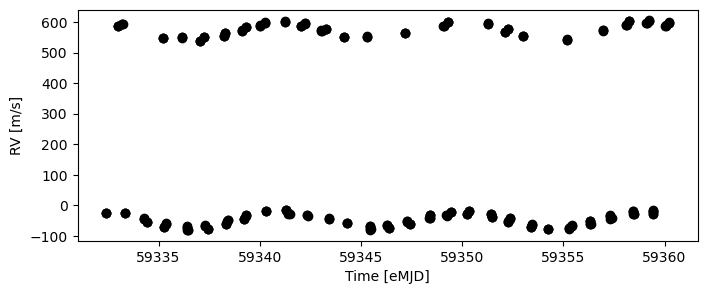

In [13]:
plt.figure(figsize=(8,3))
plt.xlabel('Time [eMJD]')
plt.ylabel('RV [m/s]')
plt.errorbar(data_dict['Time [eMJD]'],data_dict['RV [m/s]'],yerr=data_dict['RV Err. [m/s]'],
             linestyle='None',marker='o',color='k')